In [44]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

In [36]:
size = 200
true_intercept = 1
true_slope = 2
x = np.linspace(0,1,size)
true_regression_line = true_intercept+true_slope*x
y = true_regression_line + np.random.normal(scale=.5, size= size)
data = dict(x=x, y=y)

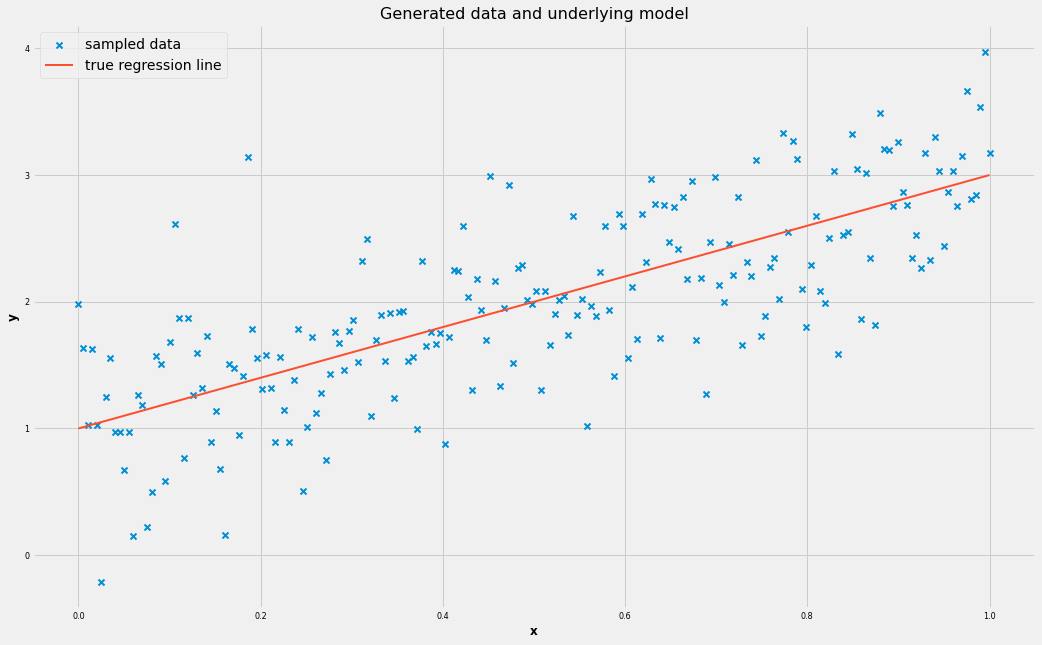

In [37]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)
ax.scatter(x, y, marker='x', color=colors[0],label='sampled data')
ax.plot(x, true_regression_line, color=colors[1], label='true regression line', lw=2.)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Generated data and underlying model', fontsize=16)
plt.legend(loc=0, fontsize=14)
plt.show()

![Diagramma modello regressione lineare gaussiana.](assets/lin_regr.png)

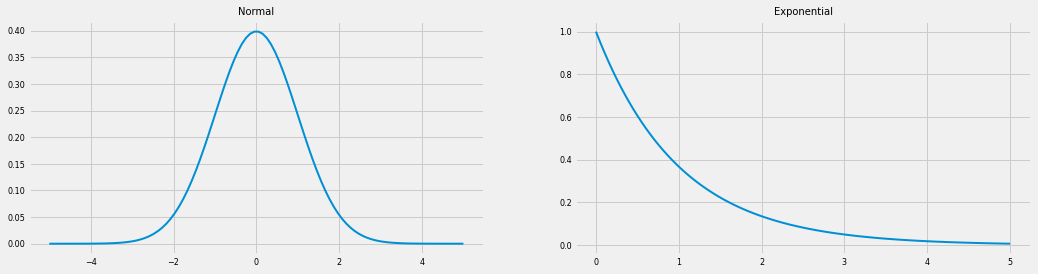

In [5]:
fig = plt.figure(figsize=(16, 4))
dist = stats.norm()
ax = fig.add_subplot(121)
x = np.linspace(-5,5, 100)
ax.plot(x, dist.pdf(x))
plt.title('Normal')
ax = fig.add_subplot(122)
dist1 = stats.expon()
x = np.linspace(0,5, 100)
ax.plot(x, dist1.pdf(x))
plt.title('Exponential')
plt.show()

In [10]:
with pm.Model() as model:
    # a priori
    sigma = pm.Exponential('sigma', lam=10)
    theta_0 = pm.Normal('theta_0', mu=0, sd=20)
    theta_1 = pm.Normal('theta_1', mu=0, sd=20)
    # likelihood
    likelihood = pm.Normal('y', mu=theta_0+theta_1*x, sd=sigma, observed=y)
    trace = pm.sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta_1, theta_0, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 33 seconds.
The acceptance probability does not match the target. It is 0.88991027757441, but should be close to 0.8. Try to increase the number of tuning steps.


/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/arviz/plots/pairplot.py:224: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(


<Figure size 1152x576 with 0 Axes>

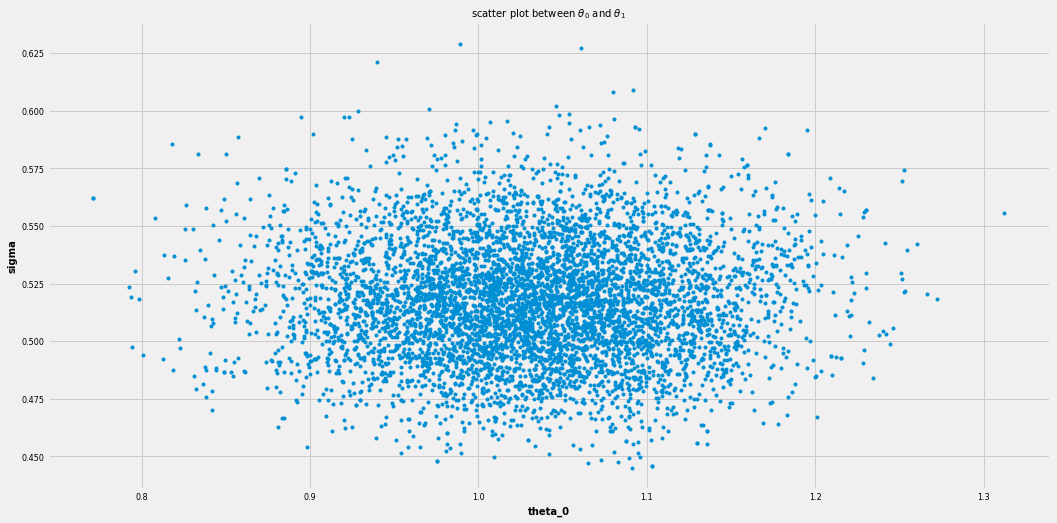

In [23]:
plt.figure(figsize=(16,8))
pm.pairplot(trace,
           var_names=['theta_0','sigma'],
           divergences=True)
plt.title(r'scatter plot between $\theta_0$ and $\theta_1$')
plt.show()

/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/traceplot.py:212: UserWarning: A valid var_name should be provided, found {'t'} expected from {'theta_0', 'sigma', 'theta_1'}
  warnings.warn(
/var/folders/ny/mqy36hy55r3c22qq88f88lbm0000gn/T/ipykernel_40632/713258124.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


<Figure size 1152x576 with 0 Axes>

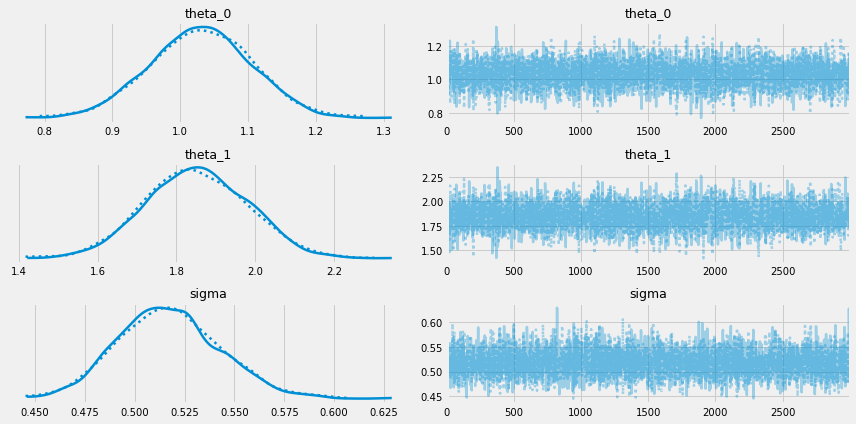

In [24]:
plt.figure(figsize=(16,8))
pm.traceplot(trace, lines={'theta_0':true_intercept, 'theta_1':true_slope})
plt.tight_layout()
plt.show()

/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


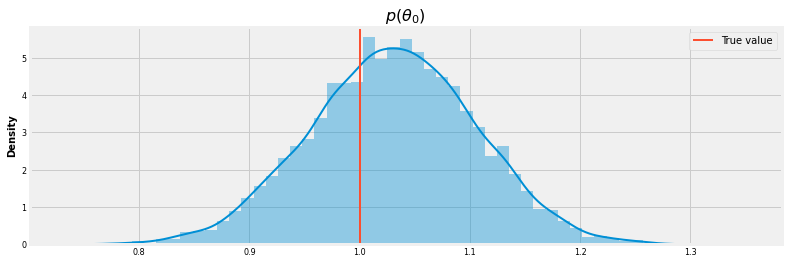

In [27]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(trace['theta_0'], color=colors[0])
ax.axvline(true_intercept, color=colors[1], label='True value')
plt.title(r'$p(\theta_0)$', fontsize=16)
plt.legend()
plt.show()

/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


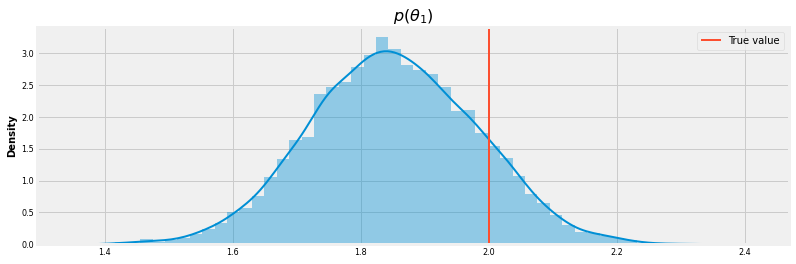

In [28]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(trace['theta_1'], color=colors[0])
ax.axvline(true_slope, color=colors[1], label='True value')
plt.title(r'$p(\theta_1)$', fontsize=16)
plt.legend()
plt.show()

/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


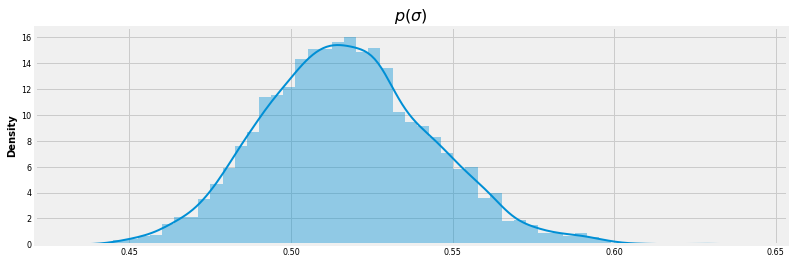

In [29]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(trace['sigma'], color=colors[0])
plt.title(r'$p(\sigma)$', fontsize=16)
plt.show()

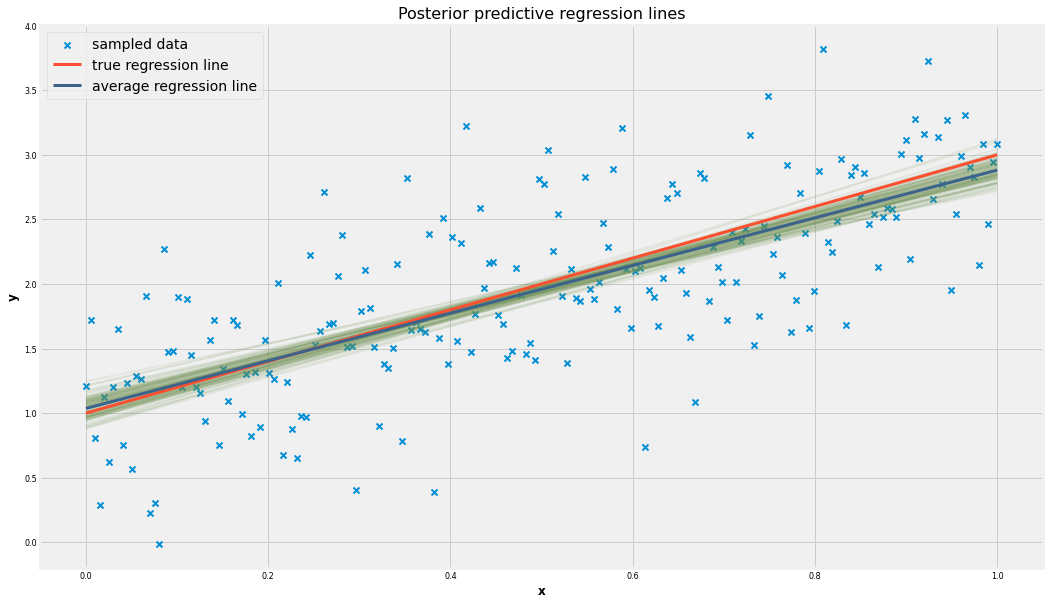

In [30]:
plt.figure(figsize=(16, 10))
plt.scatter(x, y, marker='x', color=colors[0],label='sampled data')
t0 = []
t1 = []
for i in range(100):
    ndx = np.random.randint(0, len(trace))
    theta_0, theta_1 = trace[ndx]['theta_0'], trace[ndx]['theta_1']
    t0.append(theta_0)
    t1.append(theta_1)
    p = theta_0+theta_1*x 
    plt.plot(x, p, c=colors[3], alpha=.1)
plt.plot(x, true_regression_line, color=colors[1], label='true regression line', lw=3.)
theta_0_mean = np.array(t0).mean()
theta_1_mean = np.array(t1).mean()
plt.plot(x, theta_0_mean+theta_1_mean*x, color=colors[8], label='average regression line', lw=3.)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Posterior predictive regression lines', fontsize=16)
plt.legend(loc=0, fontsize=14)
plt.show()

![Diagramma modello regressione lineare t-Student.](assets/lin_regr_1.png)

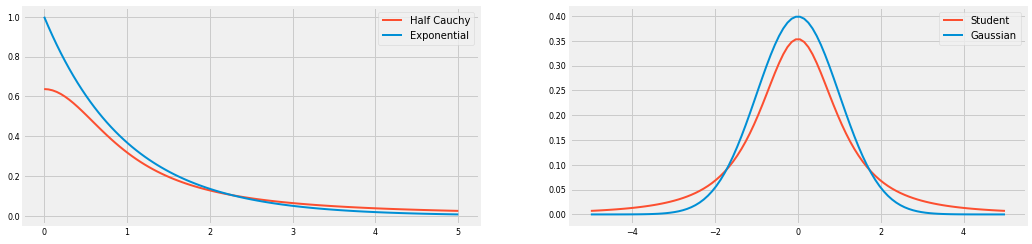

In [31]:
fig = plt.figure(figsize=(16, 4))
dist = stats.halfcauchy()
ax = fig.add_subplot(121)
x = np.linspace(0,5, 100)
ax.plot(x, dist.pdf(x), color=colors[1], label='Half Cauchy')
ax.plot(x, stats.expon.pdf(x), label='Exponential')
plt.legend()
ax = fig.add_subplot(122)
dist1 = stats.t(2)
x = np.linspace(-5,5, 100)
ax.plot(x, dist1.pdf(x), color=colors[1], label='Student')
ax.plot(x, stats.norm.pdf(x),label='Gaussian')
plt.legend()
plt.show()

In [38]:
with pm.Model() as model_1:
    # a priori
    sigma = pm.HalfCauchy('sigma', beta=1)
    theta_0 = pm.Normal('theta_0', mu=0, sd=20)
    theta_1 = pm.Normal('theta_1', mu=0, sd=20)
    # likelihood
    likelihood = pm.StudentT('y', mu=theta_0+theta_1*x, sd=sigma, nu=1.0, observed=y)
    trace_1 = pm.sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta_1, theta_0, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 40 seconds.
The acceptance probability does not match the target. It is 0.8841257372212692, but should be close to 0.8. Try to increase the number of tuning steps.


/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/traceplot.py:212: UserWarning: A valid var_name should be provided, found {'t'} expected from {'theta_0', 'sigma', 'theta_1'}
  warnings.warn(
/var/folders/ny/mqy36hy55r3c22qq88f88lbm0000gn/T/ipykernel_40632/304531286.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


<Figure size 1152x576 with 0 Axes>

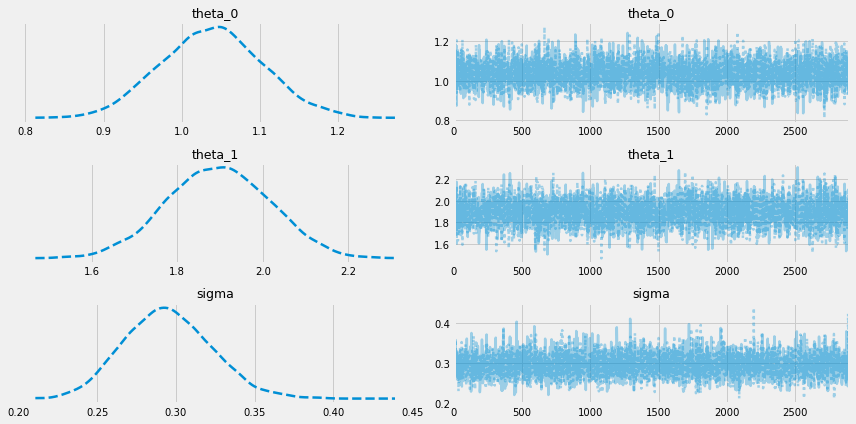

In [39]:
plt.figure(figsize=(16,8))
pm.traceplot(trace_1[100:], lines={'theta_0':true_intercept, 'theta_1':true_slope}, combined=True)
plt.tight_layout()
plt.show()

/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


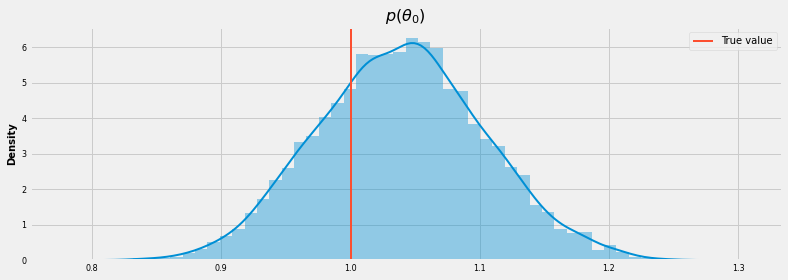

In [40]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(trace_1['theta_0'], color=colors[0])
ax.axvline(true_intercept, color=colors[1], label='True value')
plt.title(r'$p(\theta_0)$', fontsize=16)
plt.legend()
plt.show()

/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


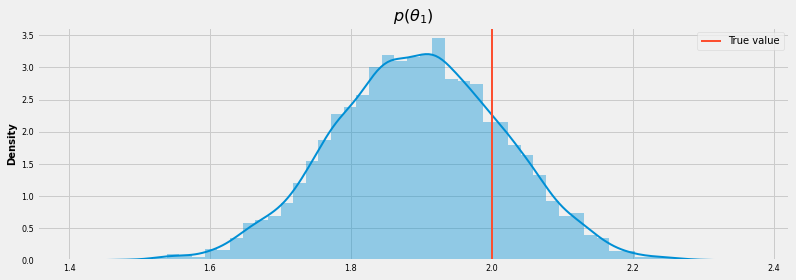

In [41]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(trace_1['theta_1'], color=colors[0])
ax.axvline(true_slope, color=colors[1], label='True value')
plt.title(r'$p(\theta_1)$', fontsize=16)
plt.legend()
plt.show()

/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


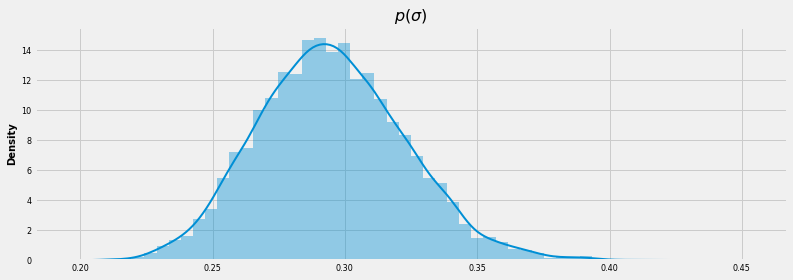

In [42]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(trace_1['sigma'], color=colors[0])
plt.title(r'$p(\sigma)$', fontsize=16)
plt.show()

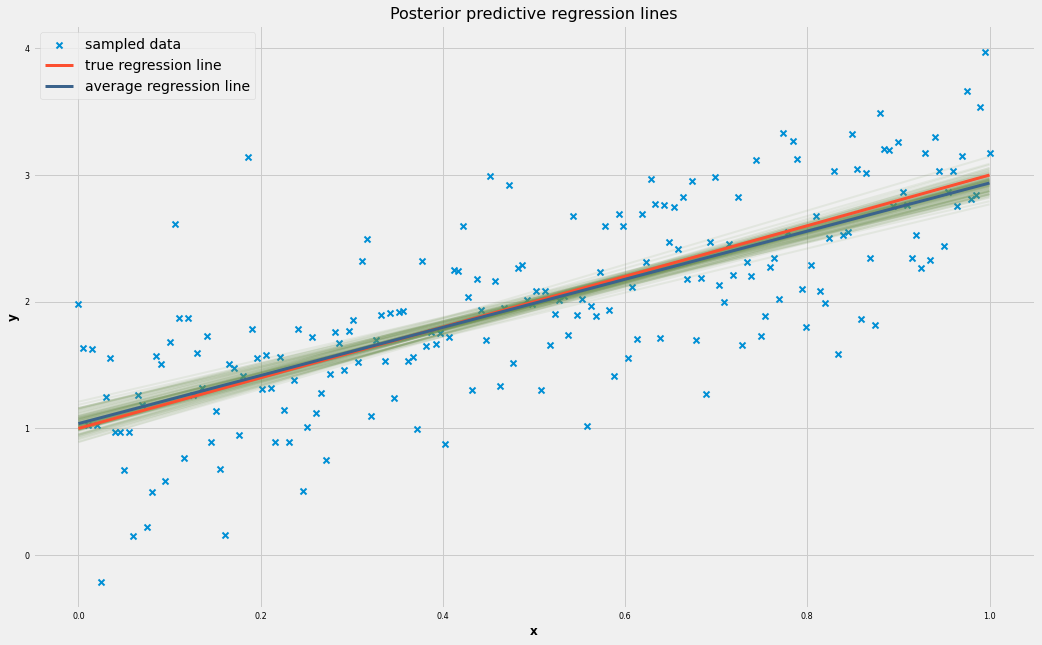

In [43]:
plt.figure(figsize=(16, 10))
plt.scatter(x, y, marker='x', color=colors[0],label='sampled data')
t0 = []
t1 = []
for i in range(100):
    ndx = np.random.randint(0, len(trace_1))
    theta_0, theta_1 = trace_1[ndx]['theta_0'], trace_1[ndx]['theta_1']
    t0.append(theta_0)
    t1.append(theta_1)
    p = theta_0+theta_1*x 
    plt.plot(x, p, c=colors[3], alpha=.1)
plt.plot(x, true_regression_line, color=colors[1], label='true regression line', lw=3.)
theta_0_mean = np.array(t0).mean()
theta_1_mean = np.array(t1).mean()
plt.plot(x, theta_0_mean+theta_1_mean*x, color=colors[8], label='average regression line', lw=3.)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Posterior predictive regression lines', fontsize=16)
plt.legend(loc=0, fontsize=14)
plt.show()